Shilpa Kolekar
Customer Segmentation Model

In [1]:
#load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA

In [2]:
#Load data into a dataframe
df = pd.read_csv('marketing_campaign.csv', '\t')

In [3]:
# Check the first few rows
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
# Check the shape of the data frame
df.shape

(2240, 29)

### Data Cleansing

In [5]:
# Check the data types of the variables
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
# Convert Dt_Customer variable to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].apply(['min', 'max'])

min   2012-01-08
max   2014-12-06
Name: Dt_Customer, dtype: datetime64[ns]

In [7]:
# Check for null values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# Use the mean of the income to fill in the 24 missing values in income column
df = df.fillna(df['Income'].mean())

In [9]:
# Create a column for Age of the customer using Year_Birth
df['Age'] = df.apply(lambda df:  2022 - df['Year_Birth'], axis=1)

In [10]:
# Remove outliers from Income and Age columns
df = df.drop(df.loc[df['Income'] > 600000].index)
df = df.drop(df.loc[df['Age'] > 100].index)

### Feature Engineeting

In [11]:
# Create a column for total amount spent by adding different amounts
df['Spent'] = df.apply(lambda df: df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + 
                       df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines'], axis=1)

In [12]:
# Combine the two columns for kids and teens to create a new column for chidren
df['Children'] = df.apply(lambda df: df['Kidhome'] + df['Teenhome'], axis=1)

In [13]:
# Determine living together or alone based on marital status
df['living_status']=df['Marital_Status'].replace({'Married': 2, 'Together': 2, 'Absurd': 1, 'Widow': 1, 
                                                  'YOLO': 1, 'Divorced': 1, 'Single': 1, 'Alone': 1})

In [14]:
# Determine total family members
df['family_size'] = df['living_status'] + df['Children']

In [16]:
# Convert categorical values to numeric for Education and Marital_Status
le = LabelEncoder()
df['Education'] = df[['Education']].apply(le.fit_transform)
df['Marital_Status'] = df[['Marital_Status']].apply(le.fit_transform)

In [17]:
# Drop columns no longer needed
to_drop = ["Kidhome", "Teenhome", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID", "AcceptedCmp1", 
           "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"]
df = df.drop(to_drop, axis=1)

In [18]:
# Check the shape of the dataframe
df.shape

(2236, 21)

In [19]:
# 
df.describe()

Education  Marital_Status         Income      Recency    MntWines  \
count  2236.000000     2236.000000    2236.000000  2236.000000  2236.00000   
mean      2.395349        3.729428   51961.906544    49.116279   304.12746   
std       1.122978        1.075932   21411.404811    28.957284   336.59181   
min       0.000000        0.000000    1730.000000     0.000000     0.00000   
25%       2.000000        3.000000   35502.500000    24.000000    24.00000   
50%       2.000000        4.000000   51684.000000    49.000000   174.00000   
75%       3.000000        5.000000   68275.750000    74.000000   504.25000   
max       4.000000        7.000000  162397.000000    99.000000  1493.00000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2236.000000      2236.000000      2236.000000       2236.000000   
mean     26.275939       166.983453        37.536225         27.080501   
std      39.724007       225.689645        54.648562         41.299504   
min       0.000000         0.000000         0.000000          0.000000   
25%       1.000000        16.000000         3.000000          1.000000   
50%       8.000000        67.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        263.000000   

       MntGoldProds  ...  NumWebPurchases  NumCatalogPurchases  \
count   2236.000000  ...      2236.000000          2236.000000   
mean      43.983005  ...         4.087657             2.663238   
std       52.061568  ...         2.779988             2.923898   
min        0.000000  ...         0.000000             0.000000   
25%        9.000000  ...         2.000000             0.000000   
50%       24.000000  ...         4.000000             2.000000   
75%       56.000000  ...         6.000000             4.000000   
max      362.000000  ...        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth          Age        Spent  \
count        2236.000000        2236.000000  2236.000000  2236.000000   
mean            5.795617           5.318873    53.101968   605.986583   
std             3.251129           2.426886    11.703281   601.865156   
min             0.000000           0.000000    26.000000     5.000000   
25%             3.000000           3.000000    45.000000    69.000000   
50%             5.000000           6.000000    52.000000   396.500000   
75%             8.000000           7.000000    63.000000  1045.500000   
max            13.000000          20.000000    82.000000  2525.000000   

          Children  living_status  family_size  parent_status  
count  2236.000000    2236.000000  2236.000000    2236.000000  
mean      0.950805       1.644902     2.595707       0.715116  
std       0.752204       0.478650     0.907468       0.451460  
min       0.000000       1.000000     1.000000       0.000000  
25%       0.000000       1.000000     2.000000       0.000000  
50%       1.000000       2.000000     3.000000       1.000000  
75%       1.000000       2.000000     3.000000       1.000000  
max       3.000000       2.000000     5.000000       1.000000  

[8 rows x 21 columns]

### Exploratory Data Analysis

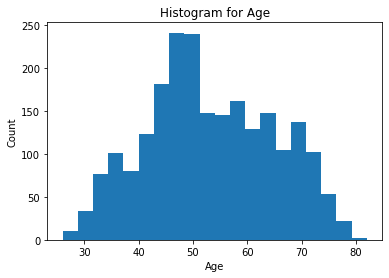

In [20]:
# Histogram for Age volumn
plt.hist(df['Age'], bins = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram for Age')
plt.show()

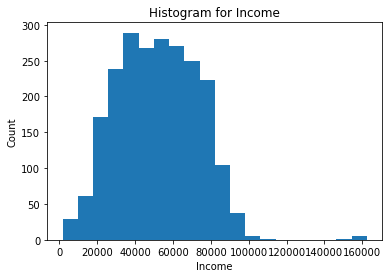

In [21]:
# Histogram for Income volumn
plt.hist(df['Income'], bins = 20)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram for Income')
plt.show()

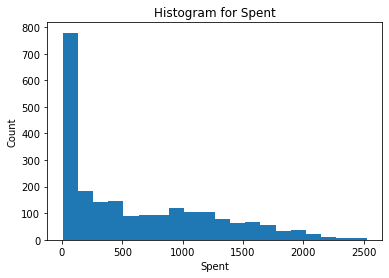

In [22]:
# Histogram for Spent volumn
plt.hist(df['Spent'], bins = 20)
plt.xlabel('Spent')
plt.ylabel('Count')
plt.title('Histogram for Spent')
plt.show()

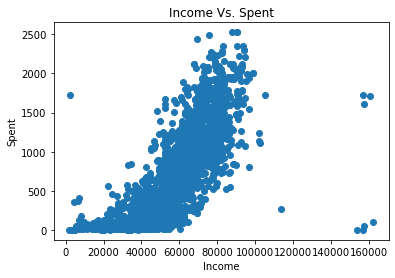

In [23]:
# Scatter plot for Income vs. Spent
plt.scatter(df['Income'], df['Spent'])
plt.xlabel('Income')
plt.ylabel('Spent')
plt.title('Income Vs. Spent')
plt.show()

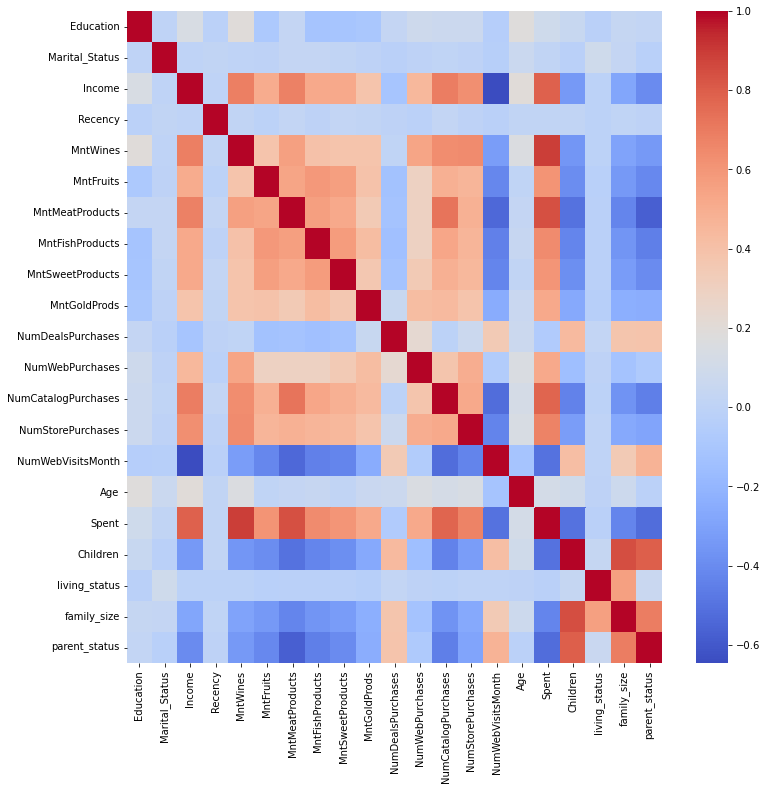

In [24]:
# Correlation Coefficient Matrix
plt.figure(figsize = (12,12))  
sns.heatmap(df.corr(), cmap='coolwarm')

In [25]:
# Scale the data using standard scaler
sc = StandardScaler()
sc.fit(df)
df = pd.DataFrame(sc.transform(df), columns = df.columns )

In [26]:
# Dimensionality Reduction using Principal Component Analysis (PCA)
pca = PCA(n_components=3)
pca.fit(df)
pca_df = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
pca_df.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2236.0 -1.060571e-16  2.774277 -5.700013 -2.446177 -0.882377  2.297366   
col2  2236.0  1.777548e-17  1.540086 -4.230712 -1.052515 -0.146433  1.040218   
col3  2236.0 -4.726889e-17  1.165007 -3.454594 -0.763259 -0.011998  0.791879   

           max  
col1  7.434820  
col2  5.711126  
col3  4.403690

In [27]:
# Image of reduced data in 3D
Scene = dict(xaxis = dict(title  = 'Col1'),yaxis = dict(title  = 'Col2'),zaxis = dict(title  = 'Col3'))
trace = go.Scatter3d(x=pca_df['col1'], y=pca_df['col2'], z=pca_df['col3'], mode='markers', 
                     marker=dict(color = 'blue', size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

# K Means Clustering

Text(0.5, 1.0, 'Elbow Method')

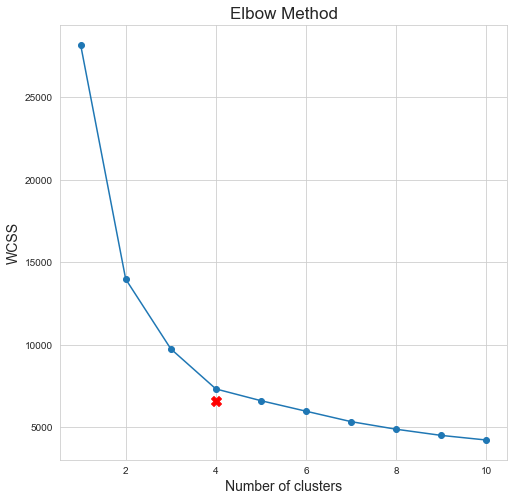

In [34]:
# K Means Clustering
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(pca_df)
    inertia_list.append(kmeans_model.inertia_)
    
#plotting the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.scatter(4, inertia_list[4], marker="X", s=100, c="r")
plt.xlabel("Number of clusters", size=14)
plt.ylabel("WCSS", size=14)
plt.title("Elbow Method", size=17)

In [35]:
print('K-Means')
kMeans = KMeans(n_clusters = 4, init = 'k-means++') 
y_pred_kMeans = kMeans.fit_predict(pca_df)
pca_df["Clusters_KMeans"] = y_pred_kMeans
df["Clusters_KMeans"] = y_pred_kMeans
print('Pred:\n', y_pred_kMeans)
print('\n\ninertia: ', kMeans.inertia_, '\n\nclusters centers:\n', kMeans.cluster_centers_)

K-Means
Pred:
 [1 0 1 ... 1 2 3]


inertia:  7332.168996937498 

clusters centers:
 [[-2.09629083e+00 -1.29325177e+00  1.33571112e-01  1.00000000e+00]
 [ 4.10636975e+00 -8.03336411e-01  4.17479747e-03  4.44089210e-16]
 [ 1.18076988e+00  1.62790759e+00 -7.19774333e-02  2.00000000e+00]
 [-2.15772243e+00  9.96985102e-01 -1.14078842e-01  3.00000000e+00]]


In [36]:
# Image of K Means Clusters in 3D
Scene = dict(xaxis = dict(title  = 'Col1'),yaxis = dict(title  = 'Col2'),zaxis = dict(title  = 'Col3'))
trace = go.Scatter3d(x=pca_df['col1'], y=pca_df['col2'], z=pca_df['col3'], mode='markers', 
                     marker=dict(color = pca_df["Clusters_KMeans"], size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

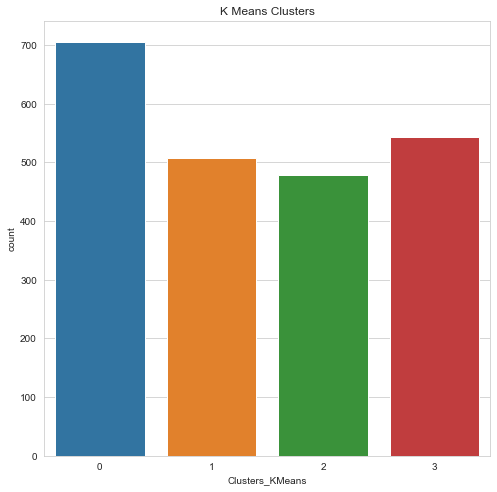

In [37]:
# K Means Clusters
pl = sns.countplot(x=df["Clusters_KMeans"])
pl.set_title("K Means Clusters")
plt.show()

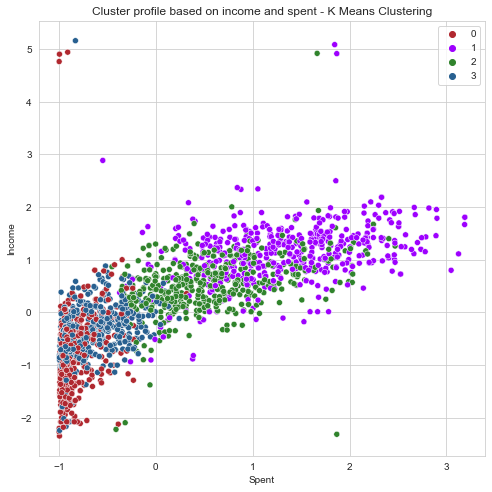

In [38]:
# Cluster profile based on income and spent for K Means Clustering
plt.rcParams['figure.figsize'] = [8,8]
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters_KMeans"], 
                    palette = ["#b0282f","#9E00FF", "#30832c","#286090"])
pl.set_title("Cluster profile based on income and spent - K Means Clustering")
plt.legend()
plt.show()

In [ ]:
# Income vs Spent scatter plot has following cluster pattern
# Cluster 0: Low income and low spent 
# Cluster 1: High income and high spent
# Cluster 2: Average income and average spent
# Cluster 3: Average income and low spent

<Figure size 576x576 with 0 Axes>

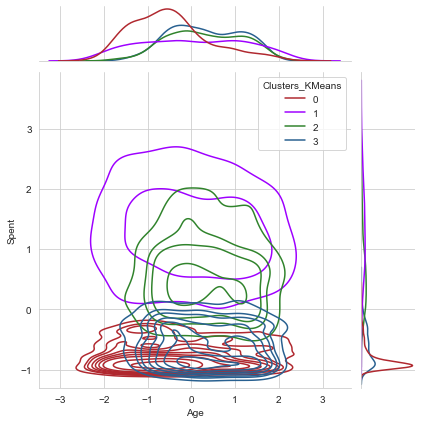

<Figure size 576x576 with 0 Axes>

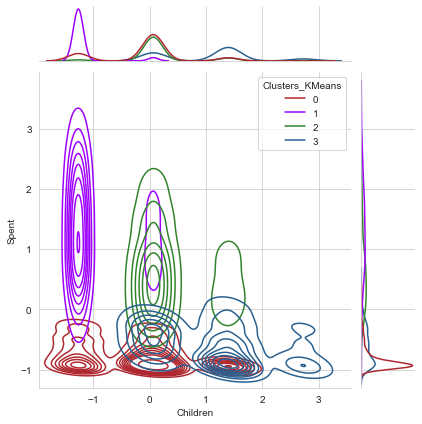

<Figure size 576x576 with 0 Axes>

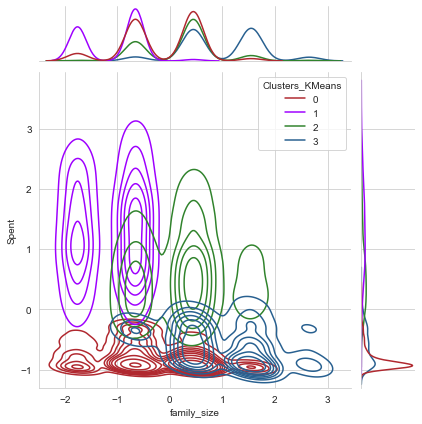

<Figure size 576x576 with 0 Axes>

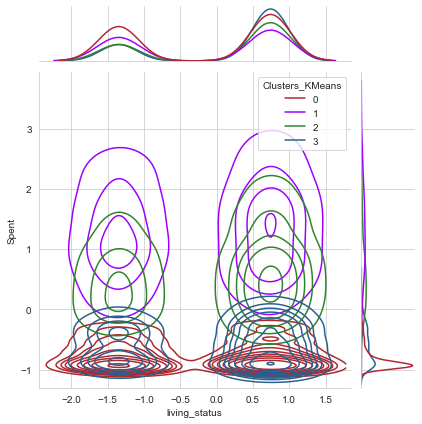

In [44]:
# Profiling the customers based on their characteristics 

features = ["Age", "Children", "family_size", "living_status"]

for i in features:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters_KMeans"], kind="kde", 
                 palette = ["#b0282f","#9E00FF", "#30832c","#286090"])
    plt.show()

The clusters have following patterns

Cluster 0: 
Low income and low spent
Repesented in all age groups
No children at home
Smaller family size
Equally Represented in both living statuses: living together and living alone

Cluster 1: 
High income and high spent
Repesented in all age groups
No children at home
Smaller family size
More living together than living alone

Cluster 2: 
Average income and average spent
More representation in older age group
Have children at home
Larger family size
More living together than living alone

Cluster 3: Average income and low spent
More representation in older age group
Have children at home
Larger family size
More living together than living alone

# Agglomerative Clustering

In [45]:
# Agglomerative Clustering 
agg = AgglomerativeClustering(n_clusters=4)
y_pred_agg = agg.fit_predict(pca_df)
pca_df["Clusters_agg"] = y_pred_agg
df["Clusters_agg"]= y_pred_agg

In [46]:
# Image of Agglomerative Clusters in 3D
Scene = dict(xaxis = dict(title  = 'Col1'),yaxis = dict(title  = 'Col2'),zaxis = dict(title  = 'Col3'))

trace = go.Scatter3d(x=pca_df['col1'], y=pca_df['col2'], z=pca_df['col3'], mode='markers', 
                     marker=dict(color = pca_df["Clusters_agg"], size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

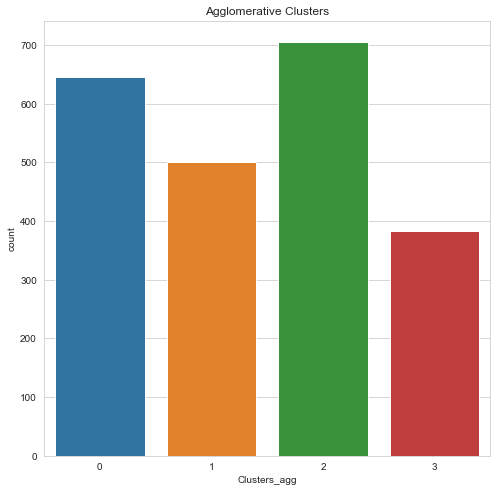

In [47]:
# Agglomerative Clusters
pl = sns.countplot(x=df["Clusters_agg"])
pl.set_title("Agglomerative Clusters")
plt.show()

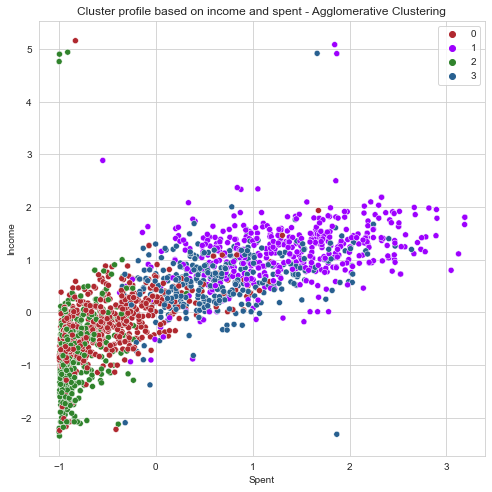

In [48]:
# Cluster profile based on income and spent for Agglomerative Clustering
plt.rcParams['figure.figsize'] = [8,8]
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters_agg"], 
                    palette = ["#b0282f","#9E00FF", "#30832c","#286090"])
pl.set_title("Cluster profile based on income and spent - Agglomerative Clustering")
plt.legend()
plt.show()

In [ ]:
# Income vs Spent scatter plot has following cluster pattern
# Cluster 0: Average income and low spent 
# Cluster 1: High income and high spent
# Cluster 2: Low income and low spent
# Cluster 3: Average income and average spent

<Figure size 576x576 with 0 Axes>

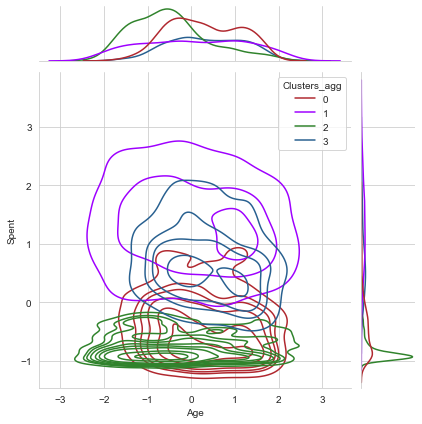

<Figure size 576x576 with 0 Axes>

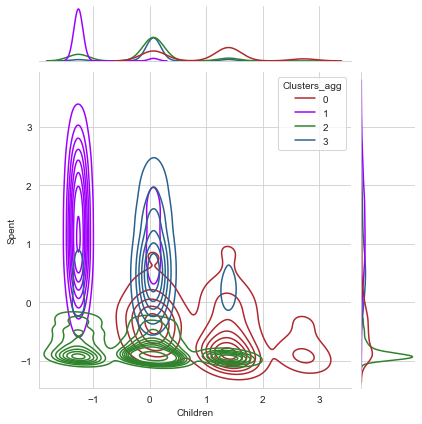

<Figure size 576x576 with 0 Axes>

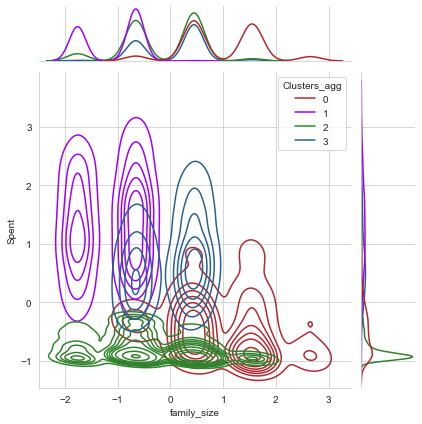

<Figure size 576x576 with 0 Axes>

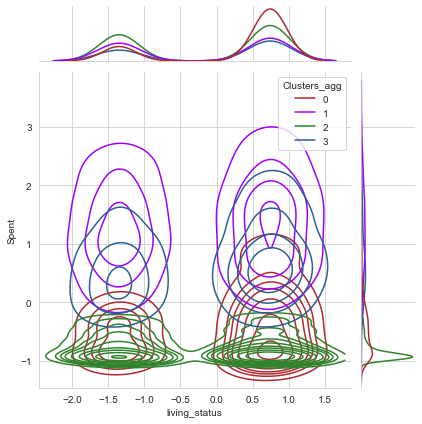

In [49]:
# Profiling the customers based on their characteristics 

features = ["Age", "Children", "family_size", "living_status"]

for i in features:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters_agg"], kind="kde", 
                 palette = ["#b0282f","#9E00FF", "#30832c","#286090"])
    plt.show()

The clusters have following patterns

Cluster 0: Average income and low spent
More representation in older age group
Have children at home
Larger family size
More living together than living alone

Cluster 1: 
High income and high spent
Repesented in all age groups
No children at home
Smaller family size
More living together than living alone

Cluster 2: 
Low income and low spent
Repesented in all age groups
No children at home
Smaller family size
Equally Represented in both living statuses: living together and living alone

Cluster 3: 
Average income and average spent
More representation in older age group
No children at home
Smaller family size
More living together than living alone